<a href="https://colab.research.google.com/github/mehraanjali/Various_Model_comparisons_before_and_after_PCA/blob/main/Various_Model_comparisons_before_and_after_PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/E-com_Data.csv')

In [ ]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,29-10-2017,6.0,03:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,05-10-2017,2.0,02:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,12-10-2017,2.0,02:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,22-08-2017,3.0,02:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,10-10-2017,2.0,02:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124005 entries, 0 to 124004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         115963 non-null  float64
 1   Item Code          124005 non-null  object 
 2   InvoieNo           124005 non-null  int64  
 3   Date of purchase   124004 non-null  object 
 4   Quantity           124004 non-null  float64
 5   Time               124004 non-null  object 
 6   price per Unit     124004 non-null  float64
 7   Price              124004 non-null  float64
 8   Shipping Location  124004 non-null  object 
 9   Cancelled_status   2012 non-null    object 
 10  Reason of return   0 non-null       float64
 11  Sold as set        0 non-null       float64
dtypes: float64(6), int64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
df.drop(['CustomerID','Item Code','InvoieNo','Date of purchase','Quantity','Time','Reason of return','Sold as set'], axis=1, inplace=True)


In [ ]:
df.head()

,price per Unit,Price,Shipping Location,Cancelled_status
0,321.0,1926.0,Location 1,NaN
1,870.0,1740.0,Location 1,NaN
2,933.0,1866.0,Location 1,NaN
3,623.0,1869.0,Location 1,NaN
4,944.0,1888.0,Location 1,NaN


In [ ]:
df.shape

(124005, 4)

In [ ]:
df.isnull().sum()

price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     121993
dtype: int64

In [ ]:
df.loc[df.Cancelled_status.isnull(),"Cancelled_status"]= False
df

,price per Unit,Price,Shipping Location,Cancelled_status
0,321.0,1926.0,Location 1,False
1,870.0,1740.0,Location 1,False
2,933.0,1866.0,Location 1,False
3,623.0,1869.0,Location 1,False
4,944.0,1888.0,Location 1,False
...,...,...,...,...
124000,803.0,803.0,Location 36,False
124001,138.0,828.0,Location 36,False
124002,865.0,865.0,Location 36,False
124003,872.0,872.0,Location 36,False


In [ ]:
df['Cancelled_status'].unique()

array([False, True], dtype=object)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(124004, 4)

In [ ]:
df.head()

,price per Unit,Price,Shipping Location,Cancelled_status
0,321.0,1926.0,Location 1,False
1,870.0,1740.0,Location 1,False
2,933.0,1866.0,Location 1,False
3,623.0,1869.0,Location 1,False
4,944.0,1888.0,Location 1,False


In [ ]:
df2 = pd.concat([df.drop(["Shipping Location" , "Cancelled_status"],axis = 1) , pd.get_dummies(df[["Shipping Location" , "Cancelled_status"]])],axis=1)

In [ ]:
df2.head()

,price per Unit,Price,Shipping Location_Location 1,Shipping Location_Location 10,Shipping Location_Location 11,Shipping Location_Location 14,Shipping Location_Location 15,Shipping Location_Location 20,Shipping Location_Location 21,Shipping Location_Location 23,Shipping Location_Location 24,Shipping Location_Location 25,Shipping Location_Location 26,Shipping Location_Location 28,Shipping Location_Location 31,Shipping Location_Location 32,Shipping Location_Location 34,Shipping Location_Location 36,Cancelled_status_False,Cancelled_status_True
0,321.0,1926.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,870.0,1740.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,933.0,1866.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,623.0,1869.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,944.0,1888.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df2.shape

(124004, 20)

In [ ]:
#defining feature matrix(X) and response vector(y)
X = df2.drop("Price", axis=1)
y = df2["Price"]

In [ ]:
X.shape, y.shape

((124004, 19), (124004,))

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
X_train

array([[-0.39829021, -0.17324695, -0.03104565, ...,  0.62591921,
         0.12948437, -0.12948437],
       [-0.22698727, -0.17324695, -0.03104565, ...,  0.62591921,
         0.12948437, -0.12948437],
       [-0.65896859, -0.17324695, -0.03104565, ..., -1.59765028,
         0.12948437, -0.12948437],
       ...,
       [-0.02340987,  5.77210744, -0.03104565, ..., -1.59765028,
         0.12948437, -0.12948437],
       [ 0.32664396, -0.17324695, -0.03104565, ..., -1.59765028,
         0.12948437, -0.12948437],
       [-0.63165943, -0.17324695, -0.03104565, ...,  0.62591921,
         0.12948437, -0.12948437]])

In [ ]:
#create linear regression object

from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()

#train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

print("MAE" , mean_absolute_error(y_test , y_pred))
print("MSE" , mean_squared_error(y_test , y_pred))
print("R2 Score" , r2_score(y_test , y_pred))

MAE 82878515658582.69
MSE 82878515658582.69
R2 Score -2.3736167272299244e+21


In [ ]:
#from sklearn.metrics import accuracy_score
#acc = accuracy_score(y_test, y_pred)
#print("Accuracy", acc*100, "%")

# **After PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train,y_train)
X_test = pca.transform(X_test)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
print("MAE" , mean_absolute_error(y_test , y_pred))
print("MSE" , mean_absolute_error(y_test , y_pred))
print("R2 Score" , r2_score(y_test , y_pred))

MAE 2047.7603347791567
MSE 2047.7603347791567
R2 Score 0.007129391389441242


In [ ]:
#from sklearn.metrics import accuracy_score
#acc = accuracy_score(y_test, y_pred)
#print("Accuracy", acc*100, "%")

# **KNeighborsClassifier**

In [ ]:
df=pd.read_csv("/content/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
X = df.drop(['price_range'],axis=1)
y=df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)
y_pred[0:5]

NameError: ignored

In [ ]:
#Test Model accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.9383333333333334

In [ ]:
#Train Model accuracy
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train , y_predTrain)

0.9421428571428572

# **After PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train,y_train)
x_test = pca.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [ ]:
accuracy_score(y_test , y_pred)

0.795

In [ ]:
#Train Model accuracy
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train , y_predTrain)

0.8235714285714286

# **LogisticRegression**

In [ ]:
df=pd.read_csv("/content/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df = df[(df['price_range'] == 0) | (df['price_range'] == 1)]

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0


In [ ]:
# Split dataset into independent and dependent features

X = df.drop(['price_range'],axis=1)
y=df['price_range']

In [ ]:
X.shape

(1000, 20)

In [ ]:
y.shape

(1000,)

In [ ]:
#splitting the dataset into the training and testing set

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, y_Train)

LogisticRegression(random_state=0)

In [ ]:
y_Pred = classifier.predict(X_Test)

In [ ]:
#Accuracy

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_Test, y_Pred)
print("Accuracy", acc*100, "%")

Accuracy 96.8 %


# **After PCA**

In [ ]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train,y_train)
X_test = pca.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, y_Train)

LogisticRegression(random_state=0)

In [ ]:
Pred = classifier.predict(X_Test)

In [ ]:
#Accuracy

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_Test, Pred)
print("Accuracy", acc*100, "%")

Accuracy 96.8 %


# **K-Means Clustering**

In [ ]:
data = "/content/Live_20210128(1).csv"

df = pd.read_csv(data)

In [ ]:
df.shape

(7050, 16)

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)

In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [ ]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
## view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
#Declare feature vector and target variable

X = df
y = df['status_type']
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [ ]:
# Convert categorical variable into integers

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
X['status_type'] = l.fit_transform(X['status_type'])
y = l.transform(y)

In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

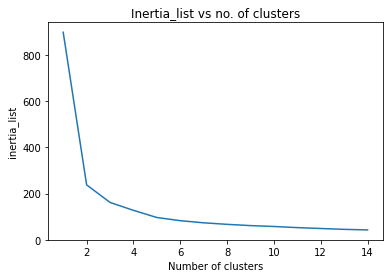

In [ ]:
# Elbow chart to find optimum number of clusters to find the values of k

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia_list = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)
plt.plot(range(1,15),inertia_list)
plt.title('Inertia_list vs no. of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('inertia_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

predicted_clusters=kmeans.fit_predict(X)

# check how many of the
#samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **After PCA**

In [ ]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train,y_train)
x_test = pca.transform(x_test)